# Dataset
The dataset that will be used within the scope of this project can be found in this Kaggle
link(https://www.kaggle.com/datasets/ethankeyes/nba-all-star-players-and-stats-1980-2022/). It contains the information about all the NBA players select to the All-Star Game since
1980 to 2022.

Together with the name of the players, the dataset provides all the main stats of the players
in the season that they wore selected: the team they played for in that year, number of games
and average minutes played, points per game, assists, rebound, blocks and more. The dataset
was submitted by user “Zeke Hall” in 2023 under a CC0: Public Domain license. All information
is stored in an 127.31 kB CSV file ('final_data.csv').

# Project Idea
The main goal in this project is to be able to determinate if a player is going be selected
to the NBA All-Star Game in the current season, based on a model trained on the dataset
mentioned above. The purpose of this project is also to find trends, clusters and similarities in the dataset.

Since the dataset contains more than 50 years of information about the
stats of the players selected, with 24 different parameters for each players, one can use different
methods to accomplish this goal. Data visualization will play a crucial role in the final project,
as one will strive to make the results evident.

Furthermore, at the end, the user can enter an example of a player and we'll try to predict whether or not it will be selected to the be at the All-Star Game.

# Algorithm and Software to be written

Since there is only positive data, as known as one-class classification, it will be used algorithms and software that can detect the outliers for a given dataset. The main focus will be to make a relative decision with "Very Likely","Likely", "Unlikely" and "Very Unlikely" classes.

For data maneuvering, we will use Pandas and scikit-learn libraries.

In [667]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

In [668]:
team_colors = {
    'PHI': '#FF883E',  # Philadelphia 76ers
    'ATL': '#E03A3E',  # Atlanta Hawks
    'CHI': '#CE1141',  # Chicago Bulls
    'BOS': '#007A33',  # Boston Celtics
    'NYK': '#F58426',  # New York Knicks
    'MIL': '#00471B',  # Milwaukee Bucks
    'CLE': '#6F263D',  # Cleveland Cavaliers
    'SEA': '#006BB6',  # Seattle SuperSonics
    'SAS': '#C4CED4',  # San Antonio Spurs
    'LAC': '#BEC0C2',  # Los Angeles Clippers
    'LAL': '#552583',  # Los Angeles Lakers
    'PHO': '#1D1160',  # Phoenix Suns
    'UTA': '#002B5C',  # Utah Jazz
    'HOU': '#CE1141',  # Houston Rockets
    'KCK': '#005DAA',  # Kansas City Kings
    'DET': '#C8102E',  # Detroit Pistons
    'NJN': '#000000',  # New Jersey Nets
    'POR': '#E03A3E',  # Portland Trail Blazers
    'GSW': '#1D428A',  # Golden State Warriors
    'DEN': '#0E2240',  # Denver Nuggets
    'WSB': '#002B5C',  # Washington Bullets
    'DAL': '#00538C',  # Dallas Mavericks
    'CHH': '#00788C',  # Charlotte Hornets
    'MIN': '#005083',  # Minnesota Timberwolves
    'MEM': '#5D76A9',  # Memphis Grizzlies
    'ORL': '#0077C0',  # Orlando Magic
    'TOR': '#CE1141',  # Toronto Raptors
    'NOH': '#85714D',  # New Orleans Hornets
    'BRK': '#000000',  # Brooklyn Nets
    'IND': '#FFC633',  # Indiana Pacers
    'MIA': '#98002E',  # Miami Heat
    'CHO': '#00788C',  # Charlotte Bobcats
    'NOP': '#0C2340',  # New Orleans Pelicans
    'OKC': '#007AC1',  # Oklahoma City Thunder
    'SAC': '#542E91',  # Sacramento Kings
    'WAS': '#E31837'   # Washington Wizards
}

def get_full_name(abbreviation):
    team_names = {
        'ATL': 'Atlanta Hawks',
        'CHI': 'Chicago Bulls',
        'BOS': 'Boston Celtics',
        'NYK': 'New York Knicks',
        'MIL': 'Milwaukee Bucks',
        'PHI': 'Philadelphia 76ers',
        'CLE': 'Cleveland Cavaliers',
        'SEA': 'Seattle SuperSonics',
        'SAS': 'San Antonio Spurs',
        'LAL': 'Los Angeles Lakers',
        'PHO': 'Phoenix Suns',
        'UTA': 'Utah Jazz',
        'KCK': 'Kansas City Kings',
        'DET': 'Detroit Pistons',
        'NJN': 'New Jersey Nets',
        'HOU': 'Houston Rockets',
        'GSW': 'Golden State Warriors',
        'DEN': 'Denver Nuggets',
        'WSB': 'Washington Bullets',
        'DAL': 'Dallas Mavericks',
        'POR': 'Portland Trail Blazers',
        'MIN': 'Minnesota Timberwolves',
        'ORL': 'Orlando Magic',
        'CHH': 'Charlotte Hornets',
        'IND': 'Indiana Pacers',
        'TOR': 'Toronto Raptors',
        'MIA': 'Miami Heat',
        'BRK': 'Brooklyn Nets',
        'NOP': 'New Orleans Pelicans',
        'CHO': 'Charlotte Bobcats',
        'OKC': 'Oklahoma City Thunder',
        'SAC': 'Sacramento Kings',
        'LAC': 'Los Angeles Clippers',
        'MEM': 'Memphis Grizzlies',
    }

    return team_names.get(abbreviation, "Team not found")

stats_cols = ['games_played', 'min', 'fgm', 'fga', 'fg3m', 'fg3a', 'ftm', 'fta', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'turnover', 'pf', 'pts', 'fg_pct', 'fg3_pct', 'ft_pct']

Treatment of Data - All Functions

In [669]:
def convert_to_minutes(time_string):
    minutes, seconds, milliseconds = map(int, time_string.split(':'))
    return minutes + seconds / 60 + milliseconds / 60000

def load_data(file_path):
    
    # Load the dataset into a Pandas DataFrame
    data = pd.read_csv(file_path)

    # Check for missing values in each column
    missing_values = data.isnull().sum()
    if missing_values.any():
        print("There are Missing Values:\n",missing_values)

    # Drop the 'year' column from the dataset
    data_without_year = data.drop('year', axis=1)
    # Generate summary statistics without the 'year' column
    summary_stats = data_without_year.describe()
    summary_stats.to_csv('summary_stats_no_year.csv', float_format='%.3f')

    # Convert 'year' column to numeric if needed
    data['year'] = pd.to_numeric(data['year'])
    data['min'] = data['min'].apply(convert_to_minutes)
    return data

def find_player_with_most_selections(data):
    # Group by player ('first' and 'last' columns) and count their All-Star selections
    player_selections = data.groupby(['first', 'last'])['year'].count()
    # Find the player with the most selections
    most_selected_player = player_selections.idxmax()
    return most_selected_player

def plot_player_performance(data, player_name):
    # Filter data for the player with the most selections
    player_data = data[(data['first'] == player_name[0]) & (data['last'] == player_name[1])]
    # Plotting the player's performance over years
    plt.figure(figsize=(10, 6))
    plt.plot(player_data['year'], player_data['pts'], marker='o', linestyle='-', label='Points')
    plt.plot(player_data['year'], player_data['reb'], marker='o', linestyle='-', label='Rebounds')
    plt.plot(player_data['year'], player_data['ast'], marker='o', linestyle='-', label='Assists')
    plt.xlabel('Year')
    plt.ylabel('Performance')
    plt.title(f'Performance Evolution of {player_name[0]} {player_name[1]} over Years')
    plt.legend()
    plt.grid(True)
    plt.show()
        
def visualize_additional_statistics(data):

    # Group by 'year' and calculate average points per game and the 3pts made and attempted
    average_pts_per_year = data.groupby('year')['pts'].mean()
    avg_3pm_per_year = data.groupby('year')['fg3m'].mean()
    avg_3pa_per_year = data.groupby('year')['fg3a'].mean()

    # Plotting the trend of points per game across different years
    plt.figure(figsize=(10, 6))
    plt.plot(average_pts_per_year.index, average_pts_per_year.values, marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel('Average Points per Game')
    plt.title('Trend of Points per Game among All-Star Players')
    plt.grid(True)
    plt.show()

    # Plotting the trend of average three-pointers made and attempted across different years
    plt.figure(figsize=(10, 6))
    plt.plot(avg_3pm_per_year.index, avg_3pm_per_year.values, marker='o', linestyle='-', label='Average 3PM')
    plt.plot(avg_3pa_per_year.index, avg_3pa_per_year.values, marker='o', linestyle='-', label='Average 3PA')
    plt.xlabel('Year')
    plt.ylabel('Average Count')
    plt.title('Average Three-Pointers Made and Attempted per All-Star Player across Years')
    plt.legend()
    plt.grid(True)
    plt.show()

def visualize_top_teams_selections_evolution(data, top_teams_count=3):
    # Aggregate selections by team for each year
    team_selections = data.groupby(['year', 'team']).size().reset_index(name='selection_count')

    # Identify teams with the most selections across all years
    team_most_selections = team_selections.groupby('team')['selection_count'].sum().sort_values(ascending=False)

    # Select top N teams
    top_teams = team_most_selections.head(top_teams_count)

    # Get unique years in the dataset
    all_years = data['year'].unique()

    # Create a dictionary to track each team's selection count per year
    team_selections_dict = {team: [0] * len(all_years) for team in top_teams.index}

    # Fill the dictionary with each team's selection count per year
    for team in top_teams.index:
        team_data = team_selections[team_selections['team'] == team]
        for year, count in zip(team_data['year'], team_data['selection_count']):
            team_selections_dict[team][list(all_years).index(year)] = count

    # Plotting the evolution of selections for top teams with custom colors
    plt.figure(figsize=(12, 6))
    for team in top_teams.index:
        plt.plot(all_years, team_selections_dict[team], marker='o',
                 label=f"{team} ({team_most_selections[team]} selections)", color=team_colors.get(team, 'black'))

    plt.xlabel('Year')
    plt.ylabel('Number of Selections')
    plt.title(f'Evolution of All-Star Selections for Top {top_teams_count} Teams')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def visualize_team_selection_evolution(data, team_abbr):
    # Get unique years from the dataset
    all_years = data['year'].unique()

    # Aggregate selections by team for each year
    team_selections = data.groupby(['year', 'team']).size().reset_index(name='selection_count')

    # Create a DataFrame for the selected team
    team_data = team_selections[(team_selections['team'] == team_abbr) & (team_selections['year'].isin(all_years))]

    if team_data.empty:
        print("No data available for the given team abbreviation.")
    else:
        # Fill missing years with zero selections
        team_data = team_data.merge(pd.DataFrame(all_years, columns=['year']), on='year', how='right')
        team_data['selection_count'].fillna(0, inplace=True)
        team_data.sort_values('year', inplace=True)

        plt.figure(figsize=(10, 6))
        plt.plot(team_data['year'], team_data['selection_count'], marker='o', color=team_colors.get(team_abbr, 'black'), linestyle='-', label=team_abbr)
        plt.xlabel('Year')
        plt.ylabel('Number of Selections')
        plt.title(f'Evolution of {get_full_name(team_abbr)} Selections')
        plt.legend()
        plt.grid(True)
        plt.show()

def group_stats_per_year(data):

    grouped_stats = data.groupby('year')[stats_cols].mean().reset_index()

    return grouped_stats

def save_grouped_stats_individually(grouped_stats):
    # Create a folder if it doesn't exist
    if not os.path.exists('plot'):
        os.makedirs('plot')

    #stats_cols = grouped_stats.columns[2:]  # Assuming the first two columns are 'year' and 'team'

    for col in stats_cols:
        plt.figure(figsize=(8, 6))
        plt.plot(grouped_stats['year'], grouped_stats[col])
        plt.xlabel('Year')
        plt.ylabel(col.capitalize())
        plt.title(f'{col.capitalize()} Over the Years')
        file_path = os.path.join('plot', f'{col}_plot.png')
        plt.savefig(file_path)  # Save the plot inside the folder
        #plt.show()
        plt.close()
   
def group_dataframe_by_year(data,year):
    return data[data['year'] == year]
        
def data_without_names(data):
    
    # Remove the names since OneClassSVM cannot read strings

    # Converting the strings of the team's name into the its color (numerical)
    team_colors_numerical = {key: int(value[1:], 16) for key, value in team_colors.items()}
    data['team_colors'] = data['team'].map(team_colors_numerical)
    
    return data.drop(['first','last','team'],axis=1)

def visualize_SVM_anomalies_3D(normalities,anomalies,var1='year',var2='pts',var3='fg3m'):
    
    ax = plt.axes(projection='3d')
    ax.scatter3D(normalities[var1],normalities[var2],normalities[var3], label = 'Normal', c='blue', marker='o')
    ax.scatter3D(anomalies[var1],anomalies[var2],anomalies[var3], label = 'Anomaly', c='red', marker='x')

    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_zlabel(var3)
    plt.title(f'Scatter Plot of {var1} vs {var2} vs {var3}')
    plt.legend()
    plt.show()

def visualize_SVM_anomalies(normalities,anomalies,var1='year',var2='pts'):

    # Scatter plot using seaborn
    sns.scatterplot(x=var1, y=var2, data=normalities, label='Normal', color='blue', marker='o')
    sns.scatterplot(x=var1, y=var2, data=anomalies, label='Anomaly', color='red', marker='x')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'Scatter Plot of {var1} vs {var2}')
    plt.legend()
    plt.show() 


Each player will be analysed by the following features: ['games_played', 'min', 'fgm', 'fga', 'fg3m', 'fg3a', 'ftm', 'fta', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'turnover', 'pf', 'pts', 'fg_pct', 'fg3_pct', 'ft_pct'].

Since later models and functions will require that all features are numerical type, it was decided to drop the player's names as well as converting the team's name to it's color. The player's team is more likely to be a more weighted parameter that the name.

In [670]:
# Load data from final_data.csv file
data = load_data('final_data.csv')

# Removing the names of the players as well as converting the teams Acronym to the team's color, so the OneClassSVM can operate
dataWithoutNames = data_without_names(data)
print(dataWithoutNames)

      year  games_played        min   fgm    fga  fg3m  fg3a   ftm   fta  \
0     1980            82  35.033333  9.68  18.59  0.05  0.22  5.15  6.54   
1     1980            75  35.916667  7.64  15.16  0.08  0.32  3.72  4.75   
2     1980            81  34.516667  6.67   9.93  0.00  0.00  4.56  6.46   
3     1980            81  34.333333  6.58  13.38  0.22  1.09  5.46  6.75   
4     1980            82  39.500000  8.77  18.33  0.24  0.92  3.45  4.00   
...    ...           ...        ...   ...    ...   ...   ...   ...   ...   
997   2022            56  34.650000  8.20  17.93  2.82  7.61  4.57  5.25   
998   2022            81  36.166667  8.86  19.47  2.67  7.35  3.98  5.26   
999   2022            56  33.533333  7.36  15.02  2.88  7.18  3.13  3.59   
1000  2022            73  33.383333  9.34  18.23  1.63  5.03  4.70  6.03   
1001  2022            63  28.400000  6.60  13.05  1.59  4.48  3.83  4.86   

      oreb  ...    ast   stl   blk  turnover    pf    pts  fg_pct  fg3_pct  \
0     2.2

The StandardScaler function calculates the standard score of a sample x as the following:
$$ z = \frac{(x - \mu_{year})}{s_{year}} $$
Where z is the stardardized value, the $\mu$ is the mean of the training samples and the s is the standard deviation of the training samples.

Next, the OneClassSVM function is used with the following parameters:

- gamma = 'scale' -> Kernell coefficient, calculated as the following: $\frac{1}{(n_{year_{features}} \times \sigma_{X_{year}}^2)}$
- nu = 0.10 -> An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors

Note that splitting the datasets for each year and evaluating for each year, as seen in the $\bold{for}$ loop.

In [671]:
x = data_without_names(data)

years = [i for i in range(1980,2023)]
years.remove(1998) # flaw in the dataset

all_anomalies = []
all_normalities = []

scaler = StandardScaler()

for year in years:
    
    dataframe_year = group_dataframe_by_year(x,year)
    
    # Standardizing the values of the dataset
    x_year_standardized = scaler.fit_transform(dataframe_year.values)

    # Fit the one class SVM to the samples X
    one_class_svm = OneClassSVM(gamma='scale',nu=0.1).fit(x_year_standardized)

    # decision_function is the signed distance to the separating hyperplane
    decision_function = one_class_svm.decision_function(x_year_standardized)

    # 1 if decision_function is positive (inlier)
    # -1 if negative (outlier)
    labels = one_class_svm.predict(x_year_standardized)
    
    anomalies = dataframe_year[labels == -1]
    all_anomalies.append(anomalies)
    normalities = dataframe_year[labels == 1]
    all_normalities.append(normalities)
    
all_anomalies_df = pd.concat(all_anomalies)
all_normalities_df = pd.concat(all_normalities)

Next, it's possible to plot the anomalies throughout the years. 

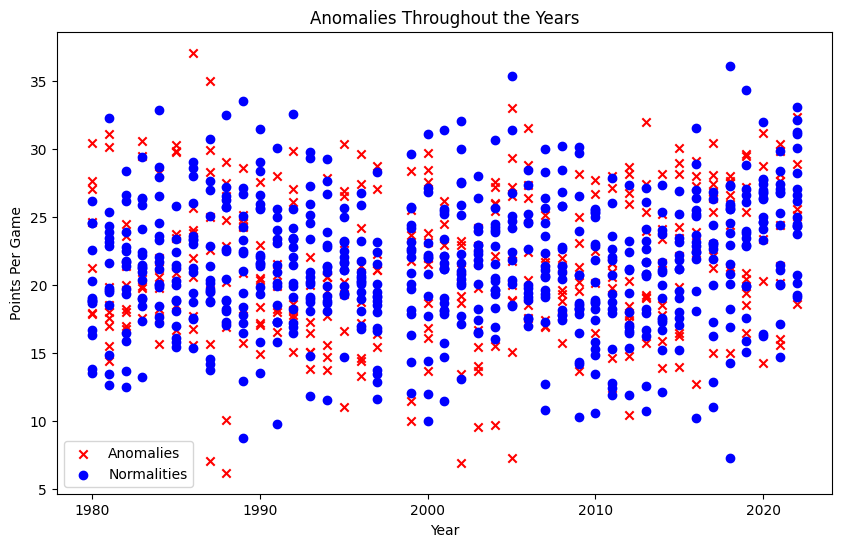

In [672]:
plt.figure(figsize=(10, 6))
plt.scatter(all_anomalies_df['year'], all_anomalies_df['pts'], color='red', marker='x', label='Anomalies')
plt.scatter(all_normalities_df['year'], all_normalities_df['pts'], color='blue', marker='o', label='Normalities')
plt.xlabel('Year')
plt.ylabel('Points Per Game')
plt.title('Anomalies Throughout the Years')
plt.legend()
plt.show()

Let's take a look at the influence of the made 3-pointers (fg3m) and points per game over the years:

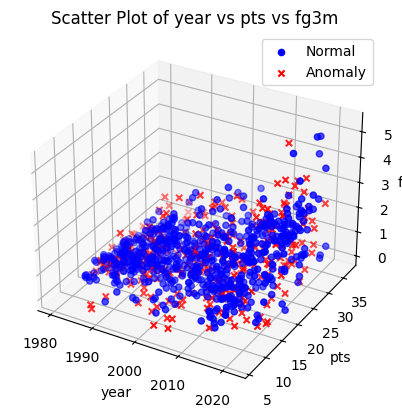

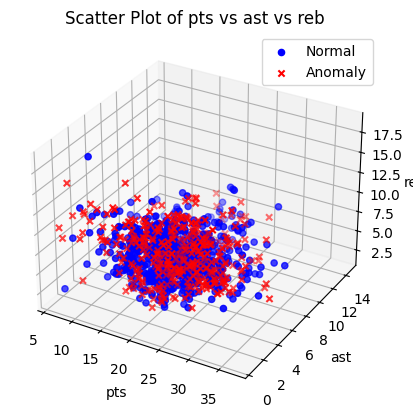

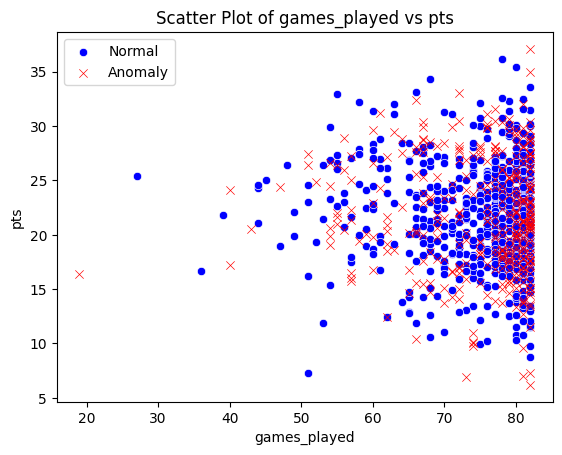

In [673]:
visualize_SVM_anomalies_3D(all_normalities_df,all_anomalies_df)
visualize_SVM_anomalies_3D(all_normalities_df,all_anomalies_df,'pts','ast','reb')
visualize_SVM_anomalies(all_normalities_df,all_anomalies_df,'games_played','pts')

Now, let's take into consideration evaluating the whole dataset, regardless of the year.

In [674]:
x = data_without_names(data)

years = [i for i in range(1980,2023)]
years.remove(1998) # flaw in the dataset

# Standardizing the values of the dataset
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x.values)

# Fit the one class SVM to the samples X
one_class_svm = OneClassSVM(kernel='rbf',gamma='scale',nu=0.1).fit(x_standardized)

# decision_function is the signed distance to the separating hyperplane
decision_function = one_class_svm.decision_function(x_standardized)

# 1 if decision_function is positive (inlier)
# -1 if negative (outlier)
labels = one_class_svm.predict(x_standardized)

anomalies = x[labels == -1]
normalities = x[labels == 1]

Using the threshold for "Very Likely","Likely", "Unlikely" and "Very Unlikely":

In [675]:
very_likely = x[decision_function > 5]
very_unlikely = x[decision_function < -5]

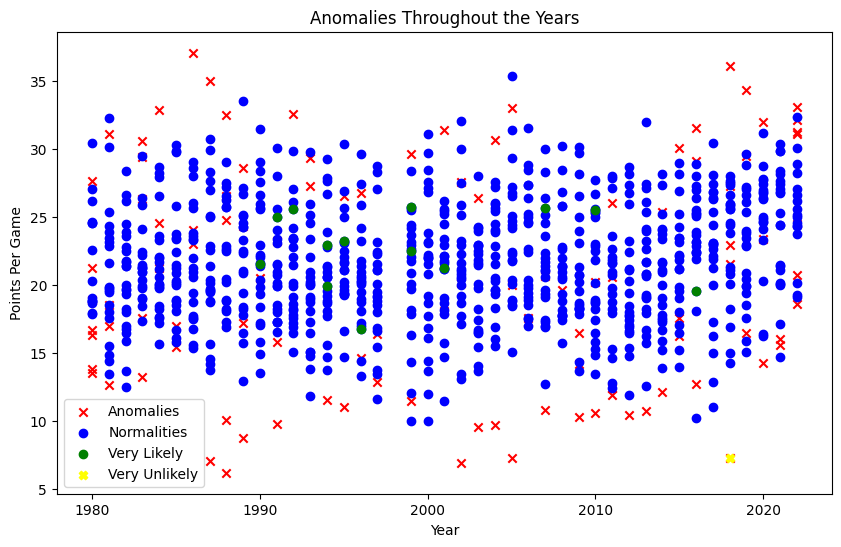

In [676]:
plt.figure(figsize=(10, 6))
plt.scatter(anomalies['year'], anomalies['pts'], color='red', marker='x', label='Anomalies')
plt.scatter(normalities['year'], normalities['pts'], color='blue', marker='o', label='Normalities')
plt.scatter(very_likely['year'], very_likely['pts'], color='green', marker='o', label='Very Likely')
plt.scatter(very_unlikely['year'], very_unlikely['pts'], color='Yellow',marker='X', label='Very Unlikely')
plt.xlabel('Year')
plt.ylabel('Points Per Game')
plt.title('Anomalies Throughout the Years')
plt.legend()
plt.show()

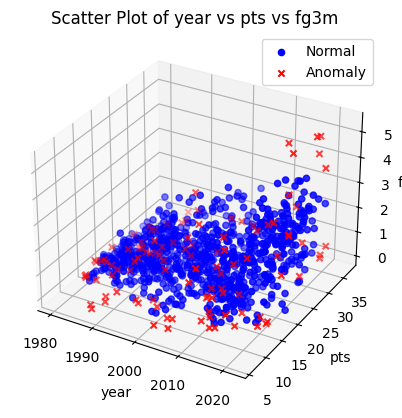

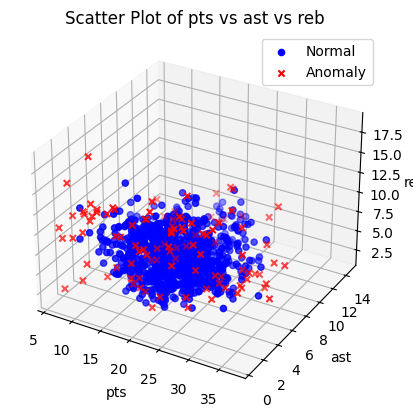

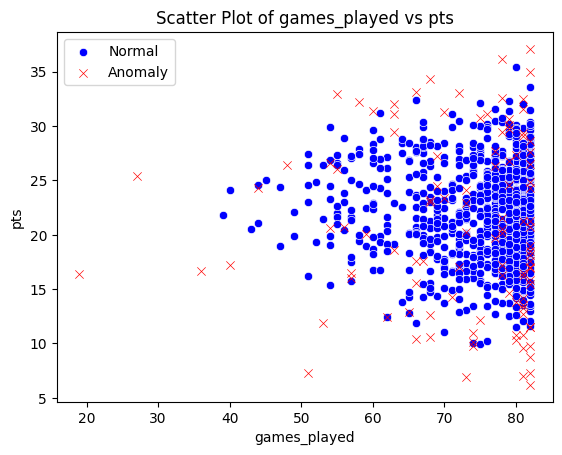

In [677]:
visualize_SVM_anomalies_3D(normalities,anomalies)
visualize_SVM_anomalies_3D(normalities,anomalies,'pts','ast','reb')
visualize_SVM_anomalies(normalities,anomalies,'games_played','pts')

Next, we're going to check if a new player will be selected to the All-Star game, as acording to this model. It is given two options to the user:
- The current NBA player Luka Doncic, with this year's stats.
- A new player with new values the user can input.

Let's first see for Luka:

In [678]:
def get_player(a=None):

    if a=='Luka Doncic':  
        return {'year':2024,'team': 21388,'games_played': 66, 'min':36.8, 'fgm':11.4, 'fga':23.5, 'fg3m':4, 'fg3a':10.4, 'ftm':6.8, 'fta':8.7,'oreb':0.7, 'dreb':7.4, 'reb':8.1, 'ast':9.1, 'stl':1.4, 'blk':0.6, 'turnover':3.9, 'pf':1.7, 'pts':33.6,'fg_pct':0.485, 'fg3_pct':0.380, 'ft_pct':0.778}
    
    if a=='peta':
        return {'year':0,'team': 0,'games_played': 0, 'min':0, 'fgm':0, 'fga':0, 'fg3m':0, 'fg3a':0, 'ftm':0, 'fta':0,'oreb':0, 'dreb':0, 'reb':0, 'ast':0, 'stl':0, 'blk':0, 'turnover':0, 'pf':0, 'pts':0,'fg_pct':0, 'fg3_pct':0, 'ft_pct':0}

    user_input = {}

    # List of parameters
    parameters = ['year','team','games_played', 'min', 'fgm', 'fga', 'fg3m', 'fg3a', 'ftm', 'fta','oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'turnover', 'pf', 'pts','fg_pct', 'fg3_pct', 'ft_pct']
    
    # Prompt the user for input for each parameter
    for param in parameters:
        if param == 'team':
            print(f"3 letter Acronym for Team (Example: GSW -> Golden State Warriors)")
        user_input[param] = input(f"Enter value for {param}: ")
        
    team = team_colors.get(user_input['team'],'')

    if team:
        numerical_value = int(team[1:], 16)
        user_input['team'] = numerical_value
    else:
        raise ValueError("Incorrect Team Acronym")
        
    return user_input
    

In [679]:
# Uncommment next line to create a new player
# newPlayer = get_player()
newPlayer = get_player('Luka Doncic')
print(newPlayer)

{'year': 2024, 'team': 21388, 'games_played': 66, 'min': 36.8, 'fgm': 11.4, 'fga': 23.5, 'fg3m': 4, 'fg3a': 10.4, 'ftm': 6.8, 'fta': 8.7, 'oreb': 0.7, 'dreb': 7.4, 'reb': 8.1, 'ast': 9.1, 'stl': 1.4, 'blk': 0.6, 'turnover': 3.9, 'pf': 1.7, 'pts': 33.6, 'fg_pct': 0.485, 'fg3_pct': 0.38, 'ft_pct': 0.778}


In [682]:
newPlayer_data = np.array(list(newPlayer.values())).reshape(1, -1)

newPlayer_standardized = scaler.transform(newPlayer_data)

x_standardized_with_newPlayer = np.vstack([x_standardized, newPlayer_standardized])

# Retrain the One-Class SVM model with the updated dataset
updated_one_class_svm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.1).fit(x_standardized_with_newPlayer)

# decision_function for the updated dataset
decision_function_updated = updated_one_class_svm.decision_function(x_standardized_with_newPlayer)

# Predictions for the updated dataset
labels_updated = updated_one_class_svm.predict(x_standardized_with_newPlayer)

# Extract the predictions for the new data point
newPlayer_label_updated = decision_function_updated[-1]

if newPlayer_label_updated > 0:
    print(f"It is likely to be selected to the all star game.")      
else:
    print(f"It is not likely to be selected to the all star game.")

It is not likely to be selected to the all star game.


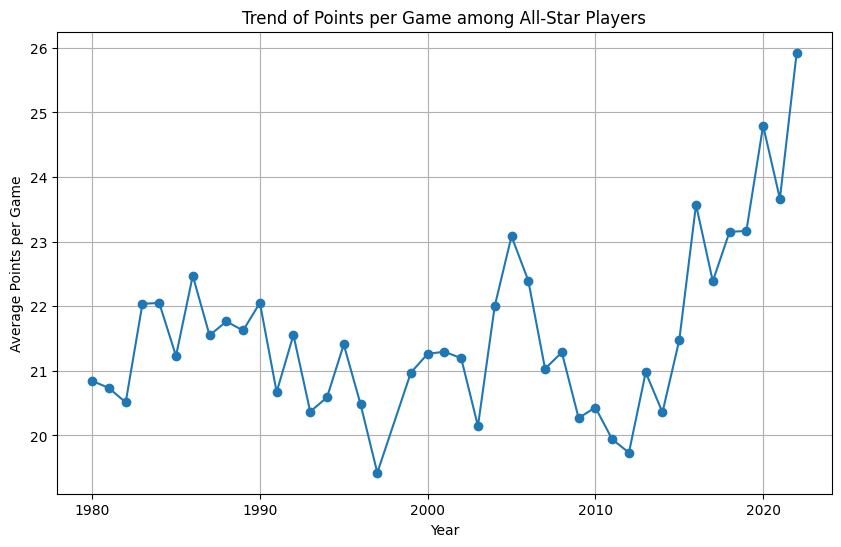

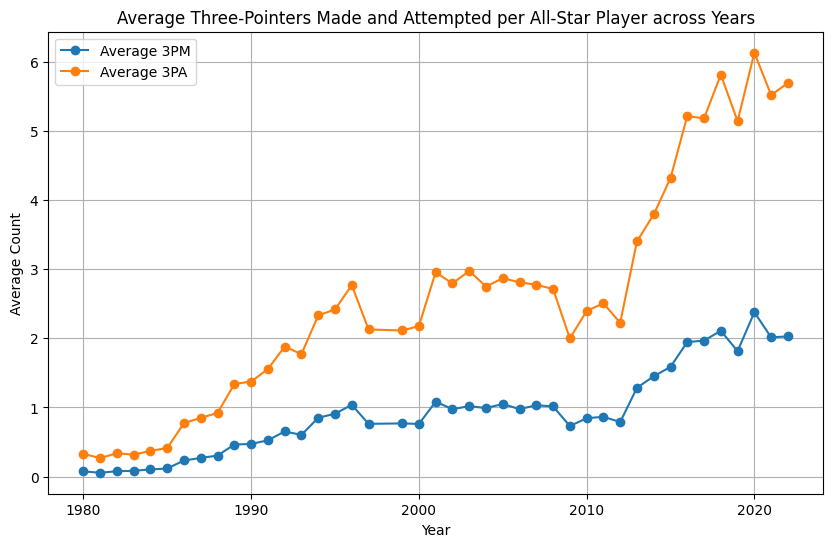

In [683]:
visualize_additional_statistics(dataWithoutNames)